In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sb

import NT_disk_Eqns_V1 as jscript
import pagn.constants as ct

In [144]:
filename = "EMRIs/SG/alpha_0.01/EMRIs_G23_1g.txt"

In [145]:
with open(filename) as f:
    lines = f.readlines()

header_end = lines.index("Data:\n") + 1
print(header_end)

data = pd.read_csv(filename, delimiter=" ", skiprows=header_end)

11


In [146]:
data.columns = [col.strip().replace(",", "") for col in data.columns]
data.keys()

Index(['logMBH/Msun', 'm1/Msun', 'r0/Rs', 'chi_eff', 'T/Myr', 't_gw/Myr',
       't_migr/Myr', 'is_emri', 'Ng', 'Unnamed: 9'],
      dtype='object')

In [ ]:
def GW_freq_fn(r, MBH, m):
    M=MBH+m
    f= 1/np.pi * (ct.G * M * 1/(r*r*r))**(1/2)
    return f

def LISAband_flag(Rstart, Rmin, MBH, m):
    lisa_flag=0
    lisa_radii=0
    R=np.linspace(Rstart, Rmin, 10000000)
    for r in R:
        GW_f=GW_freq_fn(r, MBH, m)
        R_G=ct.G*MBH*(1/(ct.c*ct.c))
        if 1.0>GW_f>0.0001 and lisa_flag==0:
            # print(f'EMRI enters LISA band at {r/R_G} R_G')
            lisa_radii+=r
            lisa_flag+=1
            break
    # if lisa_flag==0:
        # print("EMRI doesnt enter LISA band")
    return lisa_flag, lisa_radii

In [154]:
for i in range(0, len(data.is_emri)):
    if data.is_emri[i]==True:
        MBH=10**(data["logMBH/Msun"][i]) * ct.MSun

        rG=ct.G*MBH*(1/(ct.c*ct.c))
        Rs = 2*rG
        spin=(data["chi_eff"][i]+1) *0.5
        m1=data["m1/Msun"][i]*ct.MSun

        r0=data["r0/Rs"][i]*Rs

        M=MBH+m1

        Rmin= jscript.R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
        Rmax=1e4*rG #for the sake of this quick maths it doesn't really matter what this is as long as its large 

        lisa_flag, lisa_radii=LISAband_flag(r0, Rmin, MBH, m1)
        if lisa_flag!=0:
            print(f'EMRI {i} with SMBH {MBH/ct.MSun:.3e} MSun, SBH {m1/ct.MSun:.3e} MSun, SMBH spin {spin:.3e} enters LISA band at {lisa_radii/rG:.3e} R_G')
        elif lisa_flag==0:
            print(f'EMRI {i} doesnt enter LISA band')


EMRI 0 with SMBH 1.585e+05 MSun, SBH 1.674e+01 MSun, SMBH spin 6.950e-01 enters LISA band at 5.016e+00 R_G
EMRI 1 with SMBH 5.012e+06 MSun, SBH 1.080e+01 MSun, SMBH spin 7.787e-01 enters LISA band at 2.552e+01 R_G
EMRI 3 with SMBH 6.310e+06 MSun, SBH 7.077e+00 MSun, SMBH spin 6.929e-01 enters LISA band at 5.608e+00 R_G
EMRI 6 with SMBH 3.162e+06 MSun, SBH 1.827e+01 MSun, SMBH spin 2.641e-01 enters LISA band at 9.410e+00 R_G
EMRI 7 with SMBH 6.310e+06 MSun, SBH 1.073e+01 MSun, SMBH spin 3.823e-01 enters LISA band at 1.481e+01 R_G
EMRI 8 with SMBH 5.012e+06 MSun, SBH 1.746e+01 MSun, SMBH spin 6.414e-01 enters LISA band at 8.218e+00 R_G
EMRI 10 with SMBH 3.162e+06 MSun, SBH 7.190e+00 MSun, SMBH spin 7.163e-01 enters LISA band at 3.469e+01 R_G
EMRI 11 with SMBH 5.012e+06 MSun, SBH 1.844e+01 MSun, SMBH spin 9.929e-01 enters LISA band at 1.587e+01 R_G
EMRI 12 with SMBH 5.012e+06 MSun, SBH 8.873e+00 MSun, SMBH spin 8.775e-01 enters LISA band at 2.526e+01 R_G
EMRI 13 with SMBH 5.012e+06 MSun, 

In [156]:
for i in range(0, len(data.is_emri)):
    if data.is_emri[i]==False:
        MBH=10**(data["logMBH/Msun"][i]) * ct.MSun

        rG=ct.G*MBH*(1/(ct.c*ct.c))
        Rs = 2*rG
        spin=(data["chi_eff"][i]+1) *0.5
        m1=data["m1/Msun"][i]*ct.MSun

        r0=data["r0/Rs"][i]*Rs

        M=MBH+m1

        Rmin= jscript.R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
        Rmax=1e4*rG #for the sake of this quick maths it doesn't really matter what this is as long as its large 

        lisa_flag, lisa_radii=LISAband_flag(r0, Rmin, MBH, m1)
        if lisa_flag!=0:
            print(f'"Dried" EMRI {i} with SMBH {MBH/ct.MSun:.3e} MSun, SBH {m1/ct.MSun:.3e} MSun, SMBH spin {spin:.3e} enters LISA band at {lisa_radii/rG:.3e} R_G')
        elif lisa_flag==0:
            print(f'"Dried" EMRI {i} doesnt enter LISA band')

"Dried" EMRI 2 with SMBH 6.310e+07 MSun, SBH 1.036e+01 MSun, SMBH spin 9.832e-01 enters LISA band at 4.716e+00 R_G
"Dried" EMRI 4 with SMBH 7.943e+06 MSun, SBH 1.674e+01 MSun, SMBH spin 2.824e-01 enters LISA band at 1.878e+01 R_G
"Dried" EMRI 5 with SMBH 1.259e+07 MSun, SBH 1.341e+01 MSun, SMBH spin 9.651e-01 enters LISA band at 1.381e+01 R_G
"Dried" EMRI 9 with SMBH 2.512e+07 MSun, SBH 8.949e+00 MSun, SMBH spin 2.197e-01 enters LISA band at 8.715e+00 R_G
"Dried" EMRI 17 with SMBH 1.995e+06 MSun, SBH 1.054e+01 MSun, SMBH spin 5.420e-01 enters LISA band at 4.716e+01 R_G
"Dried" EMRI 18 with SMBH 1.000e+06 MSun, SBH 2.204e+01 MSun, SMBH spin 5.349e-01 enters LISA band at 7.475e+01 R_G
"Dried" EMRI 19 with SMBH 1.259e+06 MSun, SBH 2.263e+01 MSun, SMBH spin 7.065e-01 enters LISA band at 6.411e+01 R_G
"Dried" EMRI 24 with SMBH 1.259e+07 MSun, SBH 1.104e+01 MSun, SMBH spin 2.204e-01 enters LISA band at 1.381e+01 R_G
"Dried" EMRI 25 with SMBH 1.995e+07 MSun, SBH 8.389e+00 MSun, SMBH spin 1.88

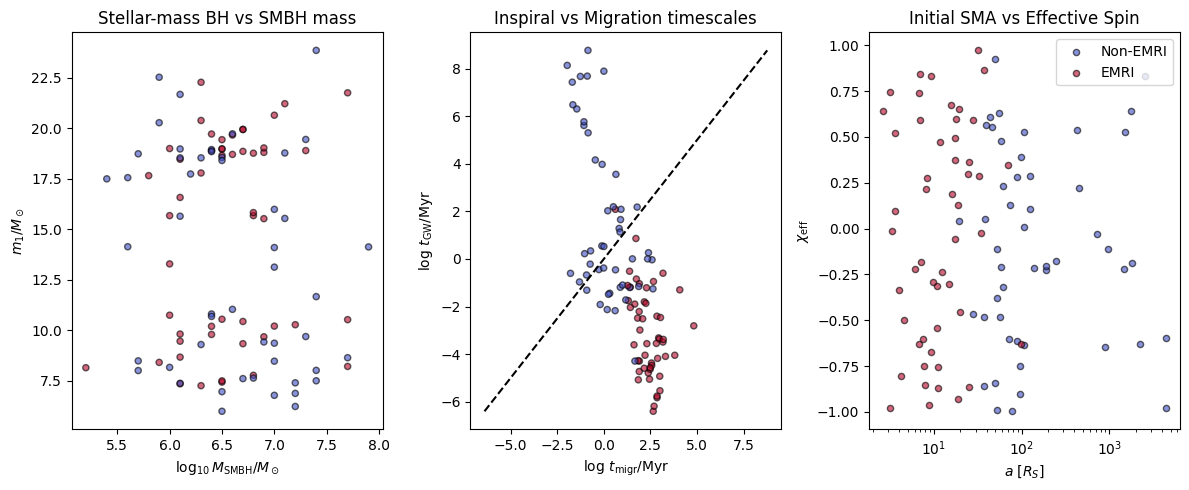

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), dpi=100)

i=0
sc1 = axs[i].scatter(data["logMBH/Msun"], data["m1/Msun"], c=data["is_emri"], cmap='coolwarm', alpha=0.6, edgecolor='k', s=20)
axs[i].set_xlabel(r'$\log_{10} M_{\rm SMBH} / M_\odot$')
axs[i].set_ylabel(r'$m_1 / M_\odot$')
axs[i].set_title('Stellar-mass BH vs SMBH mass')

i=1
t_migr = np.log10(data["t_migr/Myr"])
t_gw = np.log10(data["t_gw/Myr"])
sc2 = axs[i].scatter(t_migr, t_gw, c=data["is_emri"], cmap='coolwarm', alpha=0.6, edgecolor='k', s=20)
axs[i].plot([min(t_gw.min(), t_migr.min()), max(t_gw.max(), t_migr.max())],
            [min(t_gw.min(), t_migr.min()), max(t_gw.max(), t_migr.max())],
            'k--', label=r'$t_{\rm GW} = t_{\rm migr}$')

axs[i].set_xlabel(r'log $t_{\rm migr}$/Myr')
axs[i].set_ylabel(r'log $t_{\rm GW}$/Myr')
axs[i].set_title('Inspiral vs Migration timescales')

i=2
cmap = plt.colormaps['coolwarm']
colors_map = {0: cmap(0.), 1: cmap(1.)}
for label, group in data.groupby("is_emri"):
    axs[i].scatter(group["r0/Rs"], group["chi_eff"], color=colors_map[label],
                   label="EMRI" if label else "Non-EMRI",
                   s=20, alpha=0.6, edgecolor="k")
axs[i].set_xlabel(r'$a$ [$R_S$]')
axs[i].set_xscale('log')
axs[i].set_ylabel(r'$\chi_{\rm eff}$')
axs[i].set_title('Initial SMA vs Effective Spin')
axs[i].legend()

plt.tight_layout()
plt.savefig('EMRIs/summary.pdf')
plt.show()

In [11]:
# Function to make 1 scatter + marginal histograms
def plot_with_marginals(fig, data, x, y, is_emri, xlabel, ylabel, title, logx=False, logy=False):
    g = sb.jointplot(
        data=data,
        x=x, y=y,
        hue=is_emri,
        palette={0: "cornflowerblue", 1: "crimson"},
        alpha=0.6
    )

    g.figure.suptitle(title, y=1.02)
    g.set_axis_labels(xlabel, ylabel)

    if logx:
        g.ax_joint.set_xscale('log')
        g.ax_marg_x.set_xscale('log')
    if logy:
        g.ax_joint.set_yscale('log')
        g.ax_marg_y.set_yscale('log')




<Figure size 600x600 with 0 Axes>

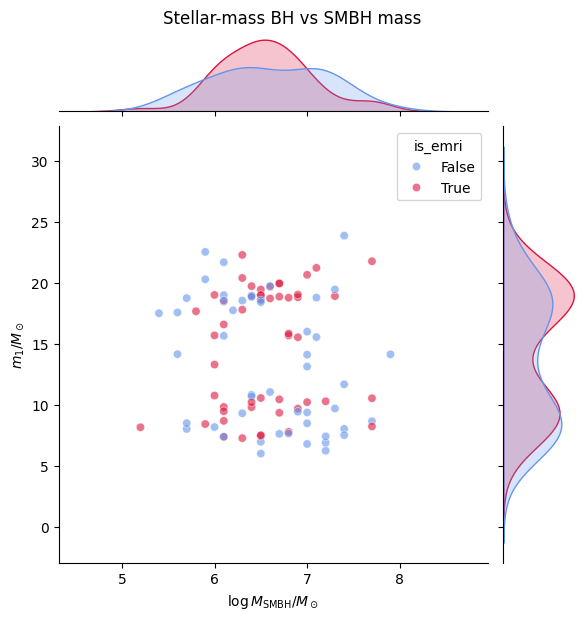

In [12]:
fig = plt.figure(figsize=(6, 6))

# Plot 1: m1 vs logMBH
plot_with_marginals(
    fig, data,
    x="logMBH/Msun",
    y="m1/Msun",
    is_emri="is_emri",
    xlabel=r'$\log M_{\rm SMBH} / M_\odot$',
    ylabel=r'$m_1 / M_\odot$',
    title='Stellar-mass BH vs SMBH mass'
)

fig.tight_layout()
plt.savefig('EMRIs/masses.pdf')
plt.show()

<Figure size 600x600 with 0 Axes>

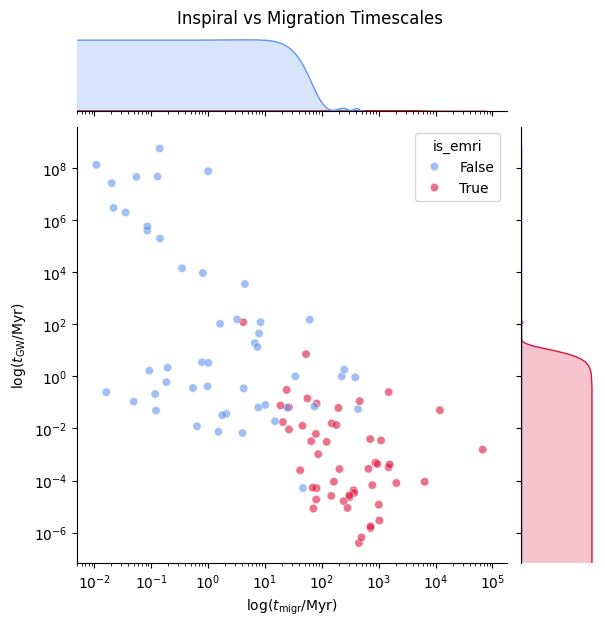

In [13]:
fig = plt.figure(figsize=(6, 6))

# Plot 2: log t_migr vs log t_gw
plot_with_marginals(
    fig, data,
    x="t_migr/Myr",
    y="t_gw/Myr",
    is_emri="is_emri",
    xlabel=r'$\log (t_{\rm migr} / \mathrm{Myr})$',
    ylabel=r'$\log (t_{\rm GW} / \mathrm{Myr})$',
    title='Inspiral vs Migration Timescales',
    logx=True,
    logy=True
)


fig.tight_layout()
plt.savefig('EMRIs/timescales.pdf')
plt.show()

<Figure size 600x600 with 0 Axes>

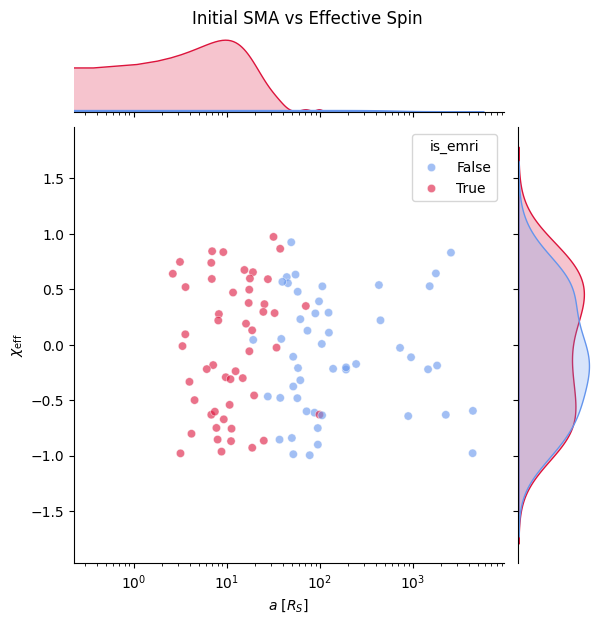

In [14]:
fig = plt.figure(figsize=(6, 6))

# Plot 3: r0 vs chi_eff
plot_with_marginals(
    fig, data,
    x="r0/Rs",
    y="chi_eff",
    is_emri="is_emri",
    xlabel=r'$a$ [$R_S$]',
    ylabel=r'$\chi_{\rm eff}$',
    title='Initial SMA vs Effective Spin',
    logx=True,
    logy=False
)


fig.tight_layout()
plt.savefig('EMRIs/sma_chieff.pdf')
plt.show()